# Aprendizaje Supervisado: Clasificación

A diferencia de la regresión, en el cual predecíamos un valor continuo, ahora intentaremos predecir la etiqueta, grupo o categoría de distintas observaciones. Por ejemplo, la regresión lineal de un conjunto de datos sociales y económicos podría utilizarse para predecir los ingresos de una persona, pero la regresión logística podría utilizarse para predecir si esa persona estaba casada, tenía hijos o había sido detenida alguna vez.

Es decir, para resolver un **Problema de clasificación** necesitamos encontrar una función:

$$
M: \mathbb{V}^n \rightarrow \left \{ c_1, c_2, \ldots, c_k \right \}
$$

que, a partir de una entrada $n$-dimensional nos devuelva a cual de las $k$ categorías o clases pertenece dicha entrada. Hay que tener en cuenta que cada variable $v_i\in \mathbb{V}, i\in\left \{1, 2, \ldots, n\right \}$ puede ser categórica, ordinal, discreta o continua.

Otra característica importante de los **problemas de clasificación** es que se encuadran dentro del **aprendizaje supervisado**, puesto que es necesario ajustar (entrenar) los modelos de clasificación a partir de un conjunto de datos de entrada etiquetados.

Un algoritmo que implementa la clasificación, especialmente en una implementación concreta, se conoce como **clasificador**. El término **clasificador** a veces también se refiere a la función matemática, implementada por un algoritmo de clasificación, que asigna los datos de entrada a una categoría.

# Regresión logística

La regresión logística, a pesar de su nombre, es una algoritmo de **clasificación** binario que basa su funcionamiento en los principios de la regresión lineal. Aunque en esencia este modelo solo puede aplicarse a **problemas de clasificación binaria**, es decir, donde solo hay dos categorías posibles, es fácilmente [extensible](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) para que pueda dar respuesta a problemas con un número de clases $k>2$.

Para poder entender su funcionamiento vamos a suponer que disponemos del siguiente conjunto de datos:

| x1 | x2 | y |
| -- | -- | - |
| 0  | 0  | 0 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

Como observamos disponemos de dos características `x1` y `x2` que condicionan la clase `0` o `1` a la que pertenece una determinada muestra. A priori, no es posible tratar este problema como uno de regresión ya que la salida `y` es discreta y no continua. Para poder resolver una clasificación usando regresión lineal, la regresión logística transforma esta salida en una salida continua empleando la función sigmoide o `logit`.

La función sigmoide es una función monótona creciente que aproxima asintóticamente a 1 para valores positivos y asintóticamente a 0 para valores negativos. Podemos verla en la siguiente imagen:

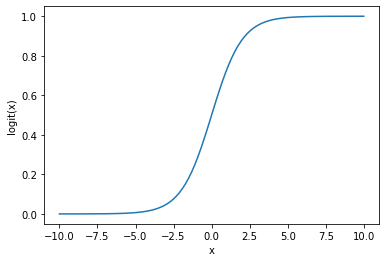

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda x: 1 / (1 + np.exp(-x))
x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('logit(x)')
plt.show()

Matemáticamente la función sigmoide se define como:

$$
logit(x) = \frac{1}{1+ e^{-x}}
$$

Por tanto, la regresión logística transforma un problema de clasificación en uno de regresión (de ahí su nombre) donde la variable objetivo $y$ es en realidad una función sigmoide. Dicho de otro modo, usando las características $x = x_1, \dots, x_m$ se calculará un valor de regresión que será pasado como parámetro de una función sigmoide. Posteriormente se establecerá un umbral para dicha salida, habitualmente $0.5$, de tal modo que todas las "regresiones" inferiores a dicho valor se clasificarán en la `clase 0` mientras que el resto se clasificarán en la `clase 1`:

$$
\hat{y} =
\begin{cases}
0 & \text{si } w x + b < 0.5 \\
1 & \text{si } w x + b \geq 0.5 \\
\end{cases}
$$

Al estar la función sigmoide acotada al intervalo $(0,1)$ podemos expresar la salida de la regresión logística en términos probabísticos. Se define, por tanto, la probabilidad de pertenecer a cada una de las clases como:

$$
p_{w,b}(x,y) =
\begin{cases}
logit(w x+b)     & \text{si } y = 1 \\
1 - logit(w x+b) & \text{si } y = 0 \\
\end{cases}
$$

Evaluando todo el conjunto de datos se obtiene la siguiente función de verosimilitud:

$$
L(w,b)= \left( \prod_{i=1}^{n} p_{w,b}(x_i,y_i) \right)^\frac{1}{n} = \left( \prod_{y_i=1} logit(wx_i+b) \prod_{y_i=0} 1-logit(wx_i+b) \right)^\frac{1}{n}
$$

Tomando la *log*-verosimilitud tenemos:

$$
l(w,b) = \log L(w,b) = \\ = \frac{1}{n} \left( \sum_{y_i=1} \log logit(wx_i+b) + \sum_{y_i=0} \log(1- logit(wx_i+b)) \right) = \\ = \frac{1}{n} \sum_{i=1}^{n} y_i \log logit(wx_i+b) + (1-y_i) log(1- logit(wx_i+b))
$$

Con la que finalmente definimos la función de coste $J(w,b)$ de la regresión logística para transformarla en un problema de optimización:

$$
\underset{w,b}{\mathrm{argmin}} - \frac{1}{n} \sum_{i=1}^{n} y_i \log logit(wx_i+b) + (1-y_i) log(1- logit(wx_i+b))
$$

Al que podemos añadirle regularización ($\ell1$, $\ell2$ o *elasticNet*) y un hiperparámetro $C$ para controlar su importancia:

$$
\underset{w,b}{\mathrm{argmin}}  \frac{1}{2} (b^2 + w^2) - C \frac{1}{n} \sum_{i=1}^{n} y_i \log logit(wx_i+b) + (1-y_i) log(1- logit(wx_i+b))
$$

Problema que podemos resolver mediante el descenso de gradiente sabiendo que $logit'(x) = logit(x) \cdot (1-logit(x))$. Las derivadas parciales respecto de $w_j$ y $b$ quedan definidas como:

$$
\frac{\partial J(w,b)}{\partial w_j} = w_j + C \frac{1}{n} \sum_{i=1}^{n} x_{i,j} ( logit(wx_i+b)-y_i)
$$

$$
\frac{\partial J(w,b)}{\partial b} = b + C \frac{1}{n} \sum_{i=1}^{n} logit(wx_i+b)-y_i
$$

Y, en consecuencia, las ecuaciones de actualización añadiendo un híper-parámetro de regularización pasan a ser:

$$
w_j \leftarrow w_j - \eta \left( w_j + C \frac{1}{n} \sum_{i=1}^{n} x_{i,j} ( logit(wx_i+b)-y_i) \right)
$$

$$
b \leftarrow b - \eta \left( b + C \frac{1}{n} \sum_{i=1}^{n} logit(wx_i+b)-y_i \right)
$$

Gráficamente la regresión logística puede interpretarse como el problema de encontrar una división lineal para un conjunto de muestras etiquetadas.

Por ejemplo, si disponemos del siguiente conjunto de datos:

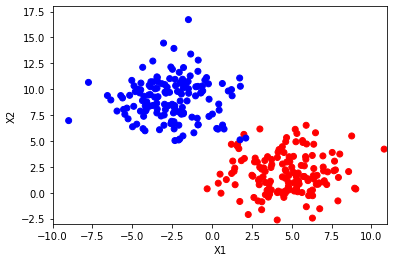

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=2, random_state=42)

plt.figure()

plt.ylim(-3, 18)
plt.xlim(-10, 11)

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

Aplicar la regresión logística dará como resultado una línea recta (estamos trabajando con 2 dimensiones) que separa ambos conjuntos de puntos:

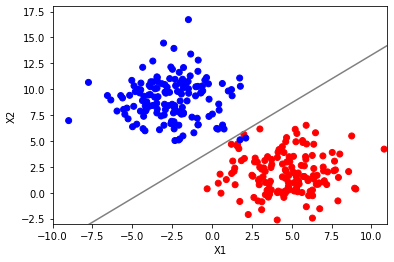

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X, y)

plt.figure()

plt.ylim(-3, 18)
plt.xlim(-10, 11)

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

line = np.linspace(-10, 12)
plt.plot(line, -(line * clf.coef_[0][0] + clf.intercept_) / clf.coef_[0][1], c='grey')

Es decir, el espacio en el que viven las muestras de nuestro conjunto de datos quedará separado linealmente en dos regiones:

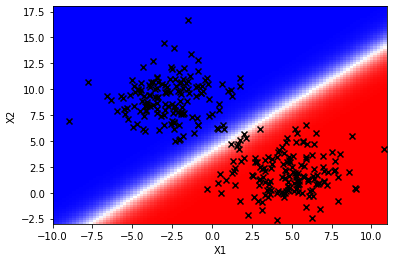

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.figure()

plt.ylim(-3, 18)
plt.xlim(-10, 11)

plt.xlabel('X1')
plt.ylabel('X2')

xx, yy = np.meshgrid(np.linspace(-10, 11, 100), np.linspace(-3, 18, 100))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
Z = Z.reshape(xx.shape) 

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r)
plt.scatter(X[:,0], X[:,1], c='k', marker='x')

En las que el límite de decisión generará incertidumbre sobre cómo clasificar una muestra y genera como salida probabilidades inferiores intermedias que dificultarán la clasificación de las mismas.

Si extendemos el ejemplo anterior para trabajar con 3 características ($x_1, x_2, x_3$) podemos observar que en lugar de dividir el espacio mediante una linea, la regresión logística encuentra un plano de separación entre ambos conjuntos de puntos:

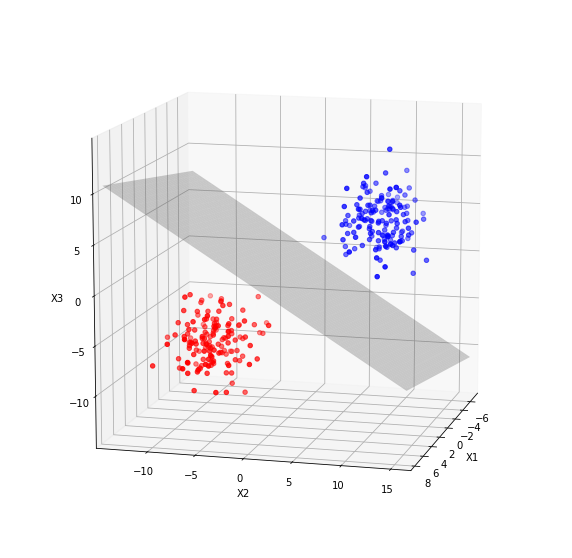

In [8]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

# 3d figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(12,15)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# draw scatter points
X, y = make_blobs(n_samples=300, n_features=3, centers=2, cluster_std=2, random_state=42)

min = np.amin(X, axis=0) * 1.2
max = np.amax(X, axis=0) * 1.2

ax.set_xlim(min[0], max[0])
ax.set_ylim(min[1], max[1])
ax.set_zlim(min[2], max[2])

ax.scatter(xs=X[:,0], ys=X[:,1], zs=X[:,2], c=y, cmap=plt.cm.bwr)

# draw decision plane
clf = LogisticRegression(random_state=42).fit(X, y)

xx = np.arange(min[0], max[0], 0.25)
yy = np.arange(min[1], max[1], 0.25)
xx, yy = np.meshgrid(xx, yy)
zz = -(clf.intercept_ + xx * clf.coef_[0][0] + yy * clf.coef_[0][1]) / (2 * clf.coef_[0][2])

ax.plot_surface(xx, yy, zz, alpha=0.3, color='grey')

Aunque la regresión logística funciona en términos generales de forma aceptable, se enfrenta al problema de que las muestras a clasificar deben ser separables linealmente. De lo contrario, la regresión logística no consigue aproximar bien el modelo y tiene *underfitting*.

Está limitación puede ser subsanada si combinamos el concepto de regresión logística con la regresión polinómica. De este modo, en lugar de encontrar una recta que separe linealmente las clases, encontrado una curva, que dependerá del grado del polinomio a utilizar, que logrará dicha separación.

La siguiente imagen muestra el resultado de aplicar regresión logística polinómica con polinomios de grado 1 (equivalente a la regresión logística lineal), 2 y 3 sobre los conjuntos de datos *blobs*, *moons* y *circles*.

C:\Users\larac\scoop\apps\python\current\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


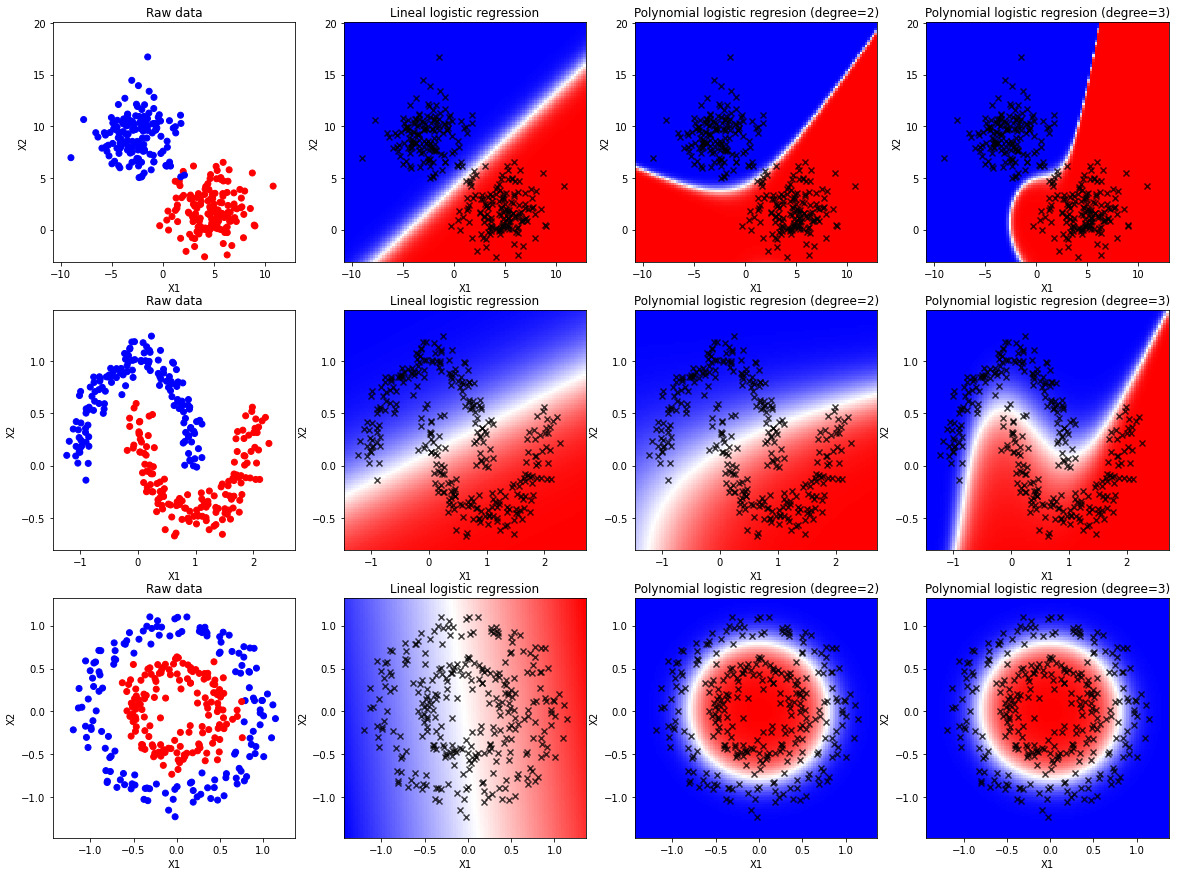

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import PolynomialFeatures

def plot_clasification(X, y, axs):
  min = np.amin(X, axis=0) * 1.2
  max = np.amax(X, axis=0) * 1.2

  axs[0].set_title('Raw data')
  axs[0].set_xlabel('X1')
  axs[0].set_ylabel('X2')

  axs[0].set_xlim(min[0], max[0])
  axs[0].set_ylim(min[1], max[1])

  axs[0].scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

  for degree in range(1,4,1):
    poly = PolynomialFeatures(degree)
    poly.fit(X)

    poly_X = poly.transform(X)

    clf = LogisticRegression(random_state=42).fit(poly_X, y)

    xx, yy = np.meshgrid(np.linspace(min[0], max[0], 100), np.linspace(min[1], max[1], 100))
    Z = clf.predict_proba(poly.transform(np.c_[xx.ravel(), yy.ravel()]))[:,0]
    Z = Z.reshape(xx.shape) 

    if degree == 1:
      axs[degree].set_title('Lineal logistic regression')
    else:
      axs[degree].set_title('Polynomial logistic regresion (degree=' + str(degree) + ')')
    axs[degree].set_xlabel('X1')
    axs[degree].set_ylabel('X2')

    axs[degree].set_xlim(min[0], max[0])
    axs[degree].set_ylim(min[1], max[1])

    axs[degree].pcolormesh(xx, yy, Z, cmap=plt.cm.bwr_r)
    axs[degree].scatter(X[:,0], X[:,1], c='k', marker='x', alpha=0.75)

fig, axs = plt.subplots(3, 4, figsize=(20,15))

X, y = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=2, random_state=42)
plot_clasification(X, y, axs[0])

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
plot_clasification(X, y, axs[1])

X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
plot_clasification(X, y, axs[2])

## Datos sintéticos

Antes de empezar a trabajar con nuestro primer modelo de clasificación vamos a estudiar cómo podemos generar conjuntos de **datos sintéticos**. Como su propio nombre indica, los **conjuntos de datos sintéticos** son un conjunto de observaciones en el espacio $n$-dimensional de entrada de un determinado problema a las cuales se le asigna a su vez una etiqueta. Por tanto, son conjuntos de **datos etiquetados**. A estas observaciones se les asignan valores y etiquetas en base a alguna función matemática a la cual además se le añade ruido aleatorio.

La principal utilidad de estas funciones generadoras es que podemos obtener conjuntos de datos etiquetados **tan grandes como queramos**. Obviamente, estos conjuntos de datos sintéticos dificilmente se podrán equiparar a un conjunto de datos tomados de algún proceso real, aunque como veremos a continuación, son muy interesantes para evaluar modelos de clasificación.

Primero, vamos a inspeccionar un problema de clasificación binaria con dos dimensiones. Utilizaremos los datos sintéticos que nos proporciona la función [`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) de _scikit-learn_. Podemos observar en la documentación que esta función recibe algunos parámetros interesantes que definen las características del conjunto de datos sintético:

* `n_samples` es el número de muestras que queremos generar. Básicamente, el tamaño en filas del _dataset_ sintético.
* `n_features` es el número de variables o _features_ $n$.
* `centers` es el número de centroides que tendrá el *dataset*, por lo que en nuestro caso se corresponde con el número de clases, categorías o etiquetas $k$.

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1337, cluster_std=3.0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\n5 primeros ejemplos:\n', X[:5, :])
print('\n5 primeras etiquetas:', y[:5])

X ~ n_samples x n_features: (1000, 2)
y ~ n_samples: (1000,)

5 primeros ejemplos:
 [[-0.77248218 -9.78386945]
 [-6.16437984 -9.8766244 ]
 [-2.53573545 -0.32197179]
 [ 0.16477951  1.96971959]
 [-3.84314208  4.96027287]]

5 primeras etiquetas: [0 0 1 1 1]


Como los datos son bidimensionales, podemos representar cada punto en un sistema de coordenadas (ejes x e y).

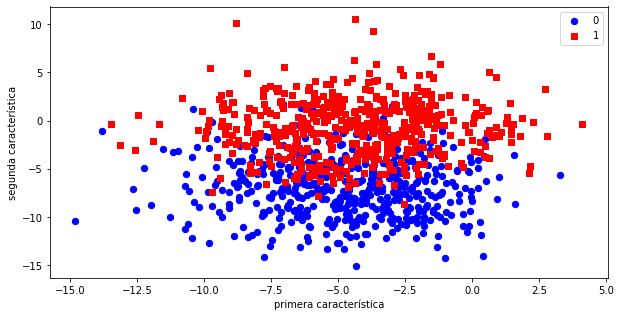

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plt.legend(loc='upper right');

### Un primer problema de clasificación

Una vez hemos visto la formulación matemática que hay detrás del modelo, pasamo a utilizarlo para resolver problemas de clasificación. Vamos a utilizar el conjunto de datos sintéticos que hemos generado anteriormente.

Como primera aproximación, vamos a dividir los datos en conjuntos de entrenamiento y test usando `train_test_split`:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1337,
                                                    stratify=y)

Como era de esperar, _scikit-learn_ tiene implementado el modelo de **regresión logística**. Se encuentra en el módulo de modelos lineales `linear_model`. Vamos a importarlo, crear un modelo con los [parámetros por defecto](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) y ajustarlo al conjunto de entrenamiento obtenido a partir del _dataset_ sintético:

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Y ahora comprobamos la puntuación del clasificador utilizando el conjunto de test:

In [12]:
classifier.score(X_test, y_test)

0.44

A continuación, se representa gráficamente la frontera de decisión que ha encontrado para las observaciones del conjunto de entrenamiento. Podemos consultar los coeficientes de la recta que ha calculado el modelo accediendo a las propiedades del mismo:

In [13]:
print(classifier.coef_)
print(classifier.intercept_)

[[-0.06493775 -0.15226954]]
[-0.00627397]


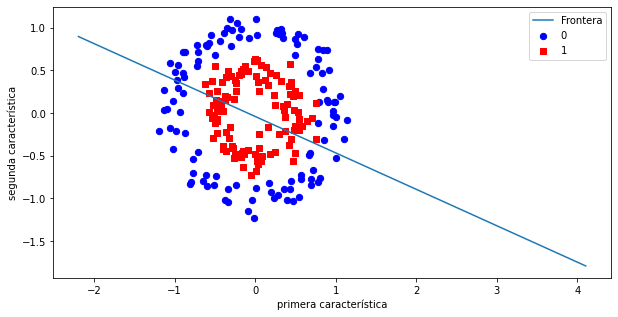

In [14]:
import numpy as np
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
            c='red', s=40, label='1', marker='s')

x_values = [np.min(X_train[y_train == 0, 0] - 1), np.max(X_train[y_train == 0, 1] + 3)]
y_values = - (classifier.intercept_ + np.dot(classifier.coef_[0][0], x_values)) / classifier.coef_[0][1]

plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plt.plot(x_values, y_values, label='Frontera')
plt.legend(loc='upper right');

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es), **Ángel González Prieto** (angel.gonzalez.prieto@upm.es) y **Raúl Lara Cabrera** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">